**1. Defining Problem Statement and Analysing basic metrics**

**Problem Statement:**

Walmart's Management team aims to analyze customer purchase behavior during Black Friday, specifically focusing on purchase amounts in relation to gender and other factors. The primary question is whether spending habits differ significantly between male and female customers during this sales event.

**Analyzing Basic Metrics:**

**Total Purchase Amount:**
Calculate the overall sum of purchase amounts made by all customers during Black Friday.

**Average Purchase Amount per Gender:**
Compute the average purchase amount for male and female customers separately to compare spending habits.

**Purchase Amount by Age Group:**
Analyze the distribution of purchase amounts across different age groups to understand if there are age-related spending patterns.

**Purchase Amount by City Category:**
Evaluate purchase amounts based on the category of the city (A, B, C) to see if location influences spending behavior.

**Purchase Amount by Marital Status:**
Compare purchase amounts between married and unmarried customers to identify any differences.

**Product Category Analysis:**
Explore how purchase amounts vary across different product categories to understand popular items during Black Friday.


-------------------------------------------------------------------------------

In [107]:
# Importing the necessery libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm



In [2]:
# Loading/Reading the csv
link = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094"
df = pd.read_csv(link)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


1.1 Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [3]:
df.shape

(550068, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Insights: Most of the columns are Catergorical in dataset, except Purchase

In [5]:
# Converting columns to objects.
df["User_ID"] = df['User_ID'].astype(str)
df["Occupation"] = df['Occupation'].astype(str)
df["Product_Category"] = df['Product_Category'].astype(str)

In [6]:
# catagorizing Marital_Status
df.loc[df["Marital_Status"] == 1, "Marital_Status"] = "Unmarried"
df.loc[df["Marital_Status"] == 0, "Marital_Status"] = "Married"


In [7]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [8]:
df.describe(include = object)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,Married,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


1.2 Non-Graphical Analysis: Value counts and unique attributes ​


In [9]:
# Unique attributes in datasets
df.describe(include = object).loc["unique"]

User_ID                       5891
Product_ID                    3631
Gender                           2
Age                              7
Occupation                      21
City_Category                    3
Stay_In_Current_City_Years       5
Marital_Status                   2
Product_Category                20
Name: unique, dtype: object

OR

In [10]:
# Unique attributes in datasets
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [11]:
# Value_counts of columns in dataset

def value_count(df):
  for col in df.columns:
    print(df[col].value_counts())
    print("________________________________________")
    print()

value_count(df)

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: count, Length: 5891, dtype: int64
________________________________________

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64
________________________________________

Gender
M    414259
F    135809
Name: count, dtype: int64
________________________________________

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64
________________________________________

Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10   

1.3  Visual Analysis - Univariate & Bivariate:
1. For continuous variable(s): Distplot, countplot, histogram for univariate analysis
2. For categorical variable(s): Boxplot
3. For correlation: Heatmaps, Pairplots

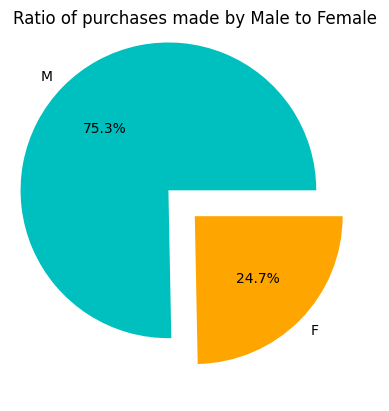

In [12]:
plt.pie(df["Gender"].value_counts().values, labels= df["Gender"].value_counts().index,
autopct='%1.1f%%', colors = ["c", "orange"], explode = (.25, 0))
plt.title("Ratio of purchases made by Male to Female")
plt.show()

Insights: Male to Female purchase **ratio is Approx. 1 : 3**

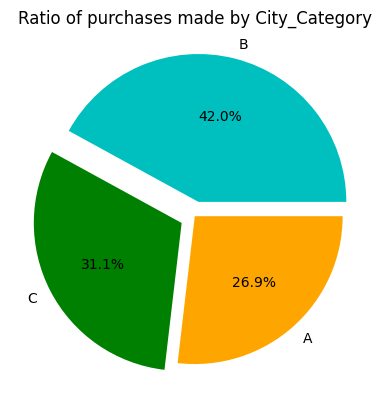

In [13]:
plt.pie(df["City_Category"].value_counts().values, labels= df["City_Category"].value_counts().index, autopct='%1.1f%%', colors = ["c", "g", "orange"], explode = (.1, .1, 0))
plt.title("Ratio of purchases made by City_Category")
plt.show()

Comments: Ration of counts purchase ditrubutes in city A, B, C as 27:31:42

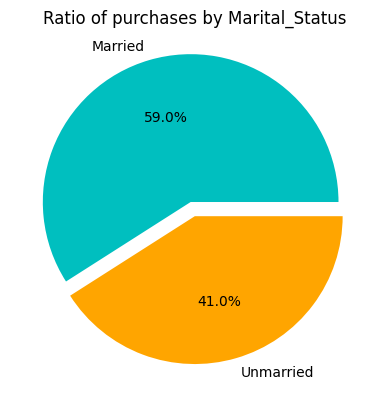

In [14]:
plt.pie(df["Marital_Status"].value_counts().values, labels= df["Marital_Status"].value_counts().index, autopct='%1.1f%%', colors = ["c", "orange"], explode = (.1, 0))
plt.title("Ratio of purchases by Marital_Status")
plt.show()

Comments: There are 41% Unmmaried and 59% Married customer = people

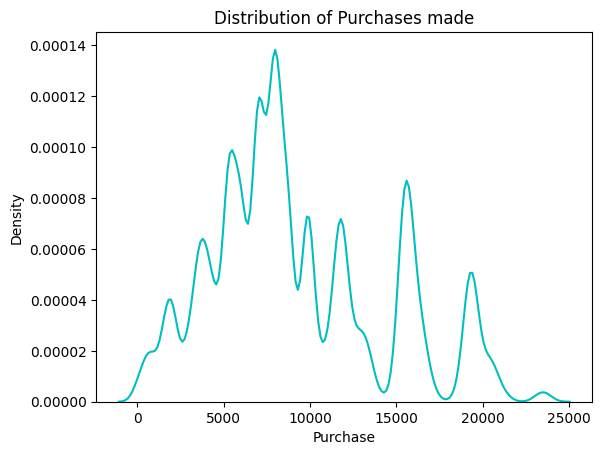

In [15]:
sns.kdeplot(df['Purchase'], color = "c")
plt.title("Distribution of Purchases made")
plt.show()

Comments: KDE diistribution of purchase amount column is not normally distributed

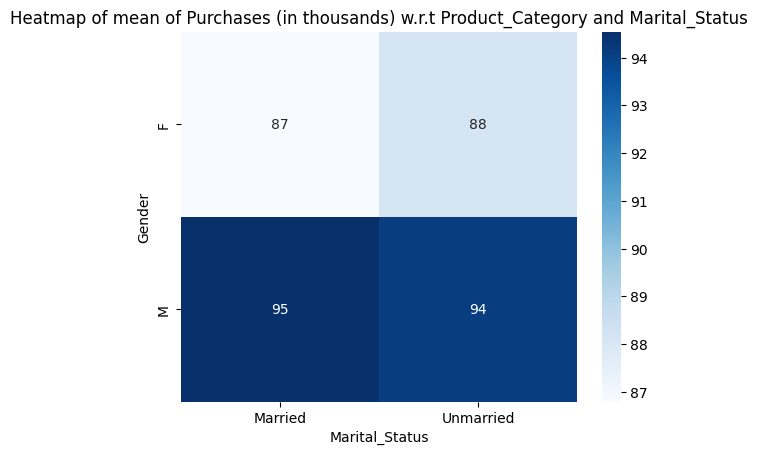

In [16]:
crosstab_result = pd.crosstab(df["Gender"], df["Marital_Status"], values = df["Purchase"]/100, aggfunc= "mean")
sns.heatmap(crosstab_result, annot=True, cmap='Blues')
plt.title("Heatmap of mean of Purchases (in thousands) w.r.t Product_Category and Marital_Status")
plt.show()

Comments: Heatmap shows, There is no significant difference between mean purchase amounts between married and unmarried customer but theere is difference in between Male and female customer for the same.

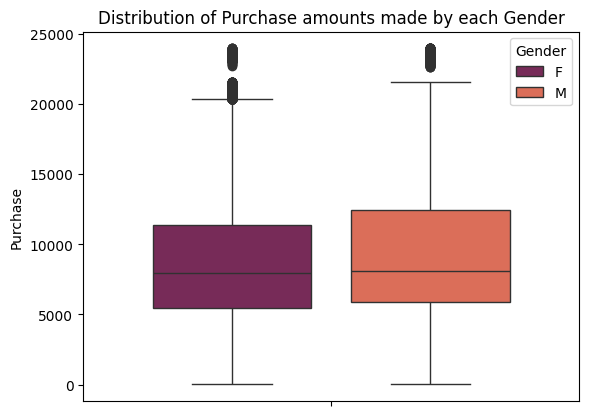

In [17]:
sns.boxplot(data = df, y = "Purchase", hue = "Gender", gap = 1.8, palette = "rocket")
plt.title("Distribution of Purchase amounts made by each Gender")
plt.show()

Comments: Boxplots shows Distrubution of purchase data for each gender as per plot there is small difference in purchase pattern of male and female, where male > female  

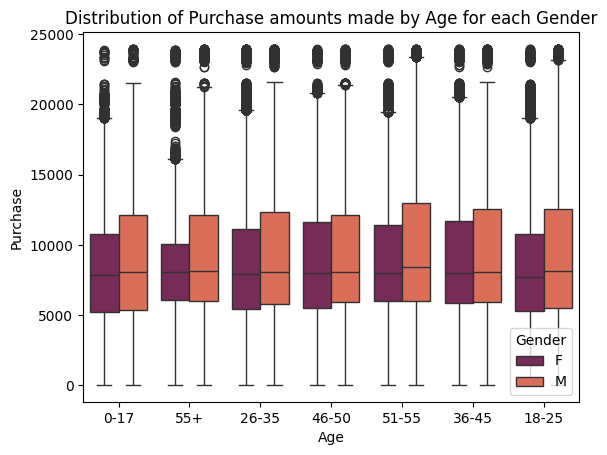

In [18]:
sns.boxplot(data = df, y = "Purchase", x =  "Age", hue ="Gender", gap = 2, palette = "rocket")
plt.title("Distribution of Purchase amounts made by Age for each Gender")
plt.show()

Comments: Boxplots shows Distrubution of purchase data by age for each gender as per plot there is small difference in purchase pattern of male and female, where male > female  but there is no significant difference is seen for age groups.

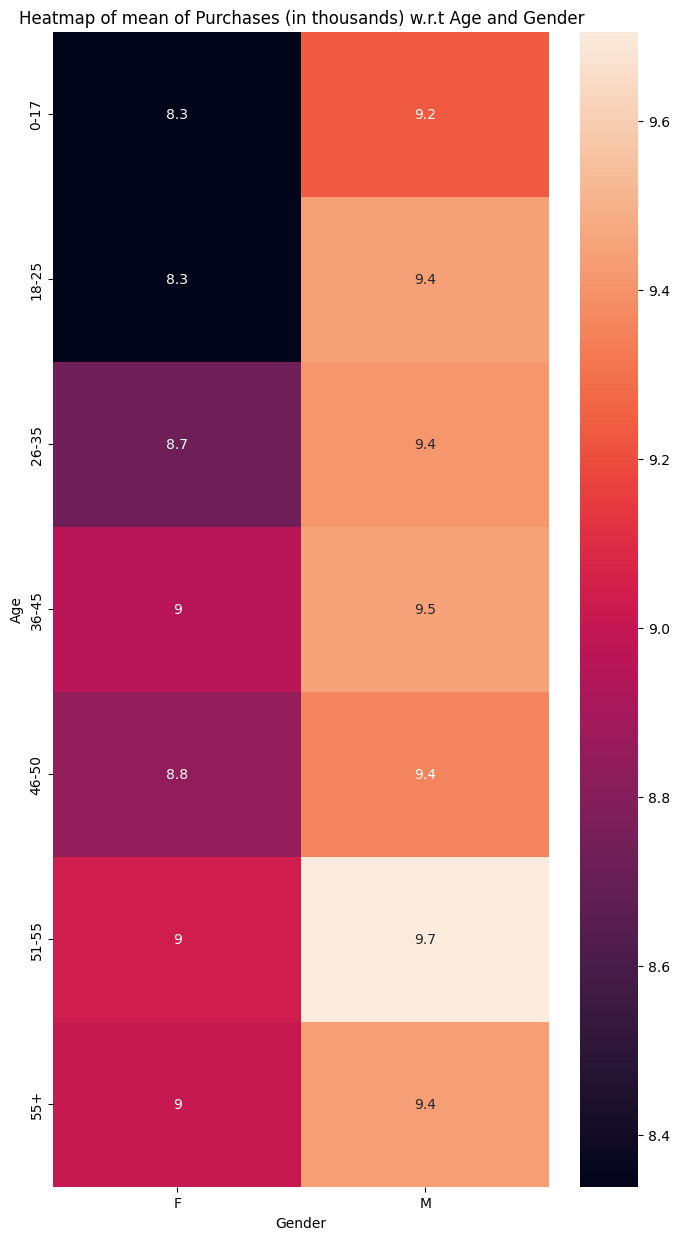

In [19]:
crosstab_result = pd.crosstab(df["Age"], df["Gender"], values=df["Purchase"]/1000, aggfunc= "mean")
plt.figure(figsize = (8, 15))
sns.heatmap(crosstab_result, annot=True, cmap='rocket')
plt.title("Heatmap of mean of Purchases (in thousands) w.r.t Age and Gender")
plt.show()

Comments: Heatmap shows Distrubution of purchase data by age for each gender as per plot there is small difference in purchase pattern of male and female, where male > female  but there is no significant difference is seen for age groups.

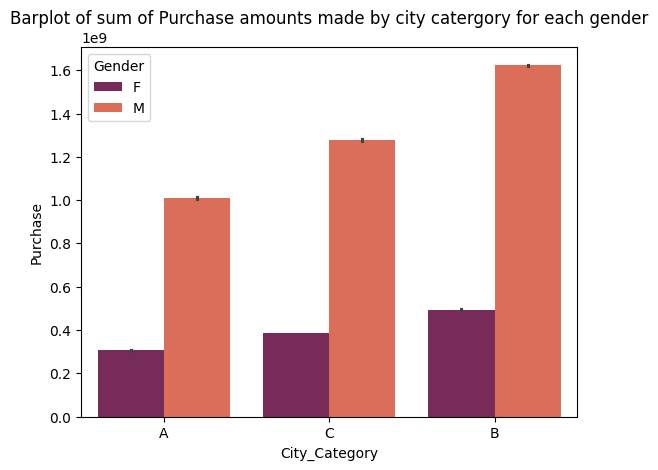

In [20]:
sns.barplot(data = df, y = "Purchase", x =  "City_Category", hue ="Gender", palette = "rocket", estimator = "sum")
plt.title("Barplot of sum of Purchase amounts made by city catergory for each gender")
plt.show()

Comments: Sum of amount of products purchased by males are more than females for all city catergories, where city B > city C > city A.




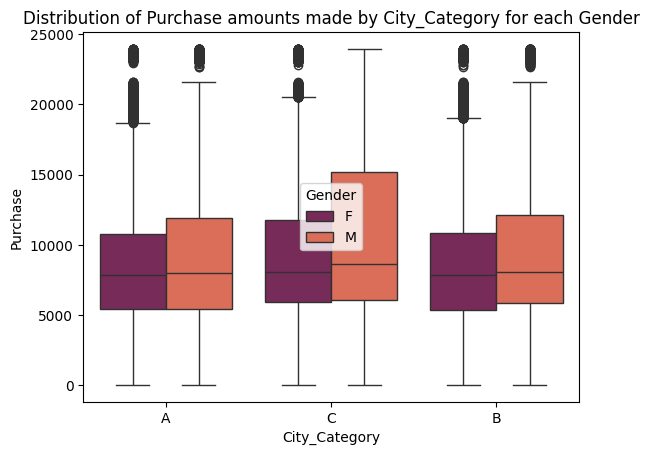

In [21]:
sns.boxplot(data = df, y = "Purchase", x =  "City_Category", hue ="Gender", gap = 2, palette = "rocket")
plt.title("Distribution of Purchase amounts made by City_Category for each Gender")
plt.show()


Comments: Distribution of amount of products purchased by males are more than females for all city catergories, where city B > city C > city A.


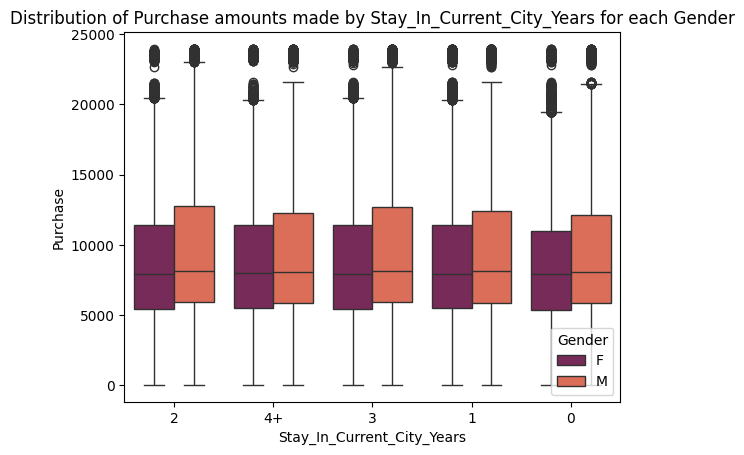

In [22]:
sns.boxplot(data = df, y = "Purchase", x =  "Stay_In_Current_City_Years", hue ="Gender", gap = 2, palette = "rocket")
plt.title("Distribution of Purchase amounts made by Stay_In_Current_City_Years for each Gender")
plt.show()


Comments: Boxplot shows there is not very significant difference among the customer stay in city (inyears) but there is more avg. purchase amount for males than females.

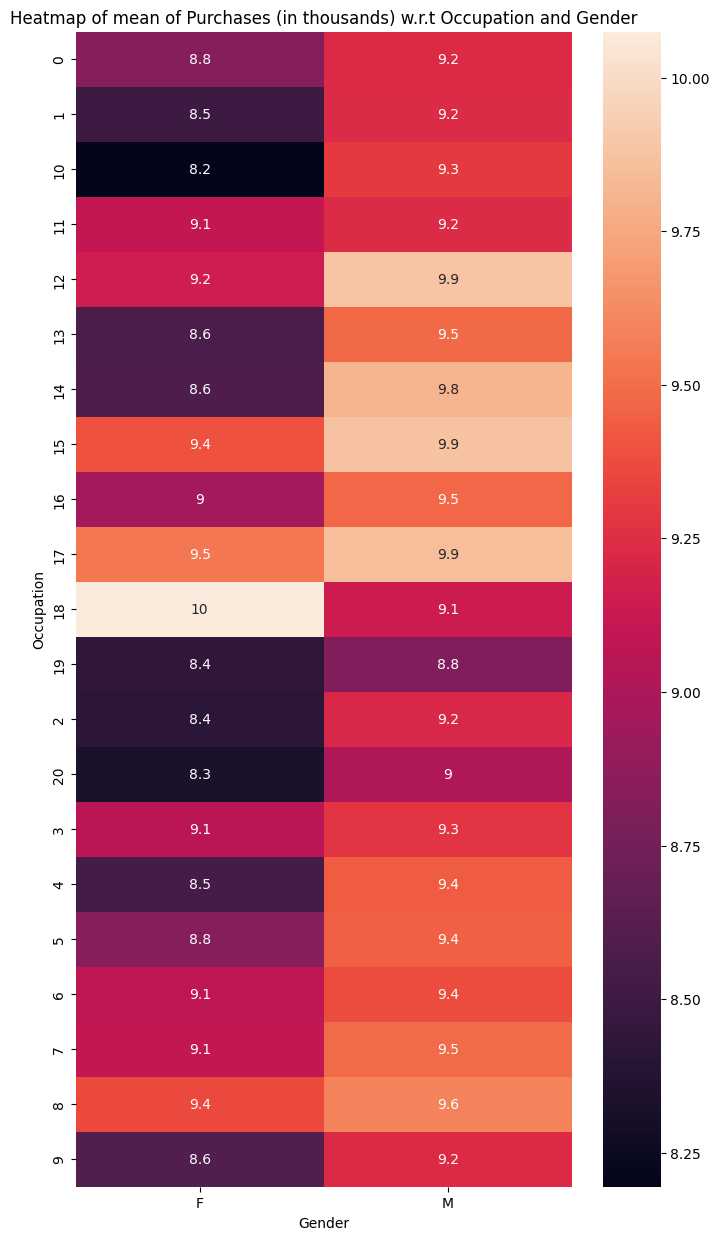

In [23]:
crosstab_result = pd.crosstab(df["Occupation"], df["Gender"], values=df["Purchase"]/1000, aggfunc= "mean")
plt.figure(figsize = (8, 15))
sns.heatmap(crosstab_result, annot=True, cmap='rocket')
plt.title("Heatmap of mean of Purchases (in thousands) w.r.t Occupation and Gender")
plt.show()

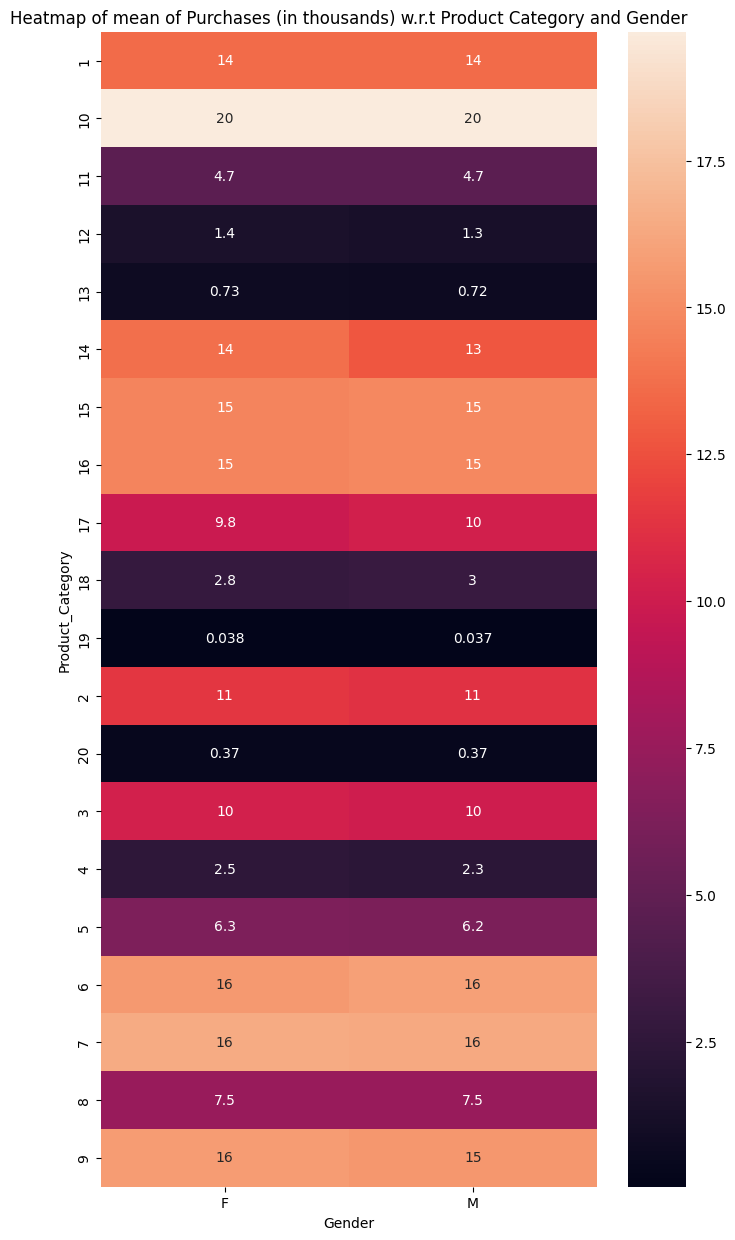

In [24]:
crosstab_result = pd.crosstab(df["Product_Category"], df["Gender"], values=df["Purchase"]/1000, aggfunc= "mean")
plt.figure(figsize = (8, 15))
sns.heatmap(crosstab_result, annot=True, cmap='rocket')
plt.title("Heatmap of mean of Purchases (in thousands) w.r.t Product Category and Gender")
plt.show()

Comments: There is no significant difference between purchase of product categories between male and female. Both male and female bought equal avg amount of almost all products.

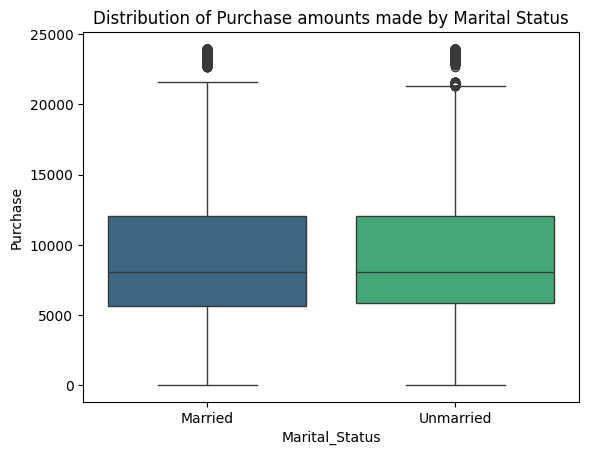

In [25]:
sns.boxplot(data = df, y = "Purchase", x =  "Marital_Status", hue ="Marital_Status", gap = 2, palette = "viridis")
plt.title("Distribution of Purchase amounts made by Marital Status")
plt.show()

Comments: There is no significant difference between avg purchase amount among married and unmarried people.

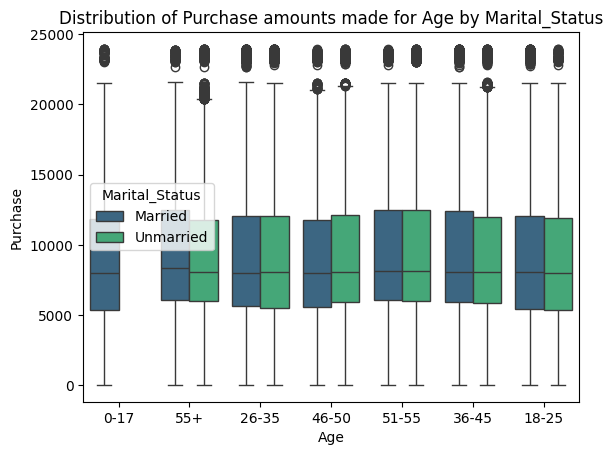

In [26]:
sns.boxplot(data = df, y = "Purchase", x =  "Age", hue ="Marital_Status", gap = 2, palette = "viridis")
plt.title("Distribution of Purchase amounts made for Age by Marital_Status")
plt.show()

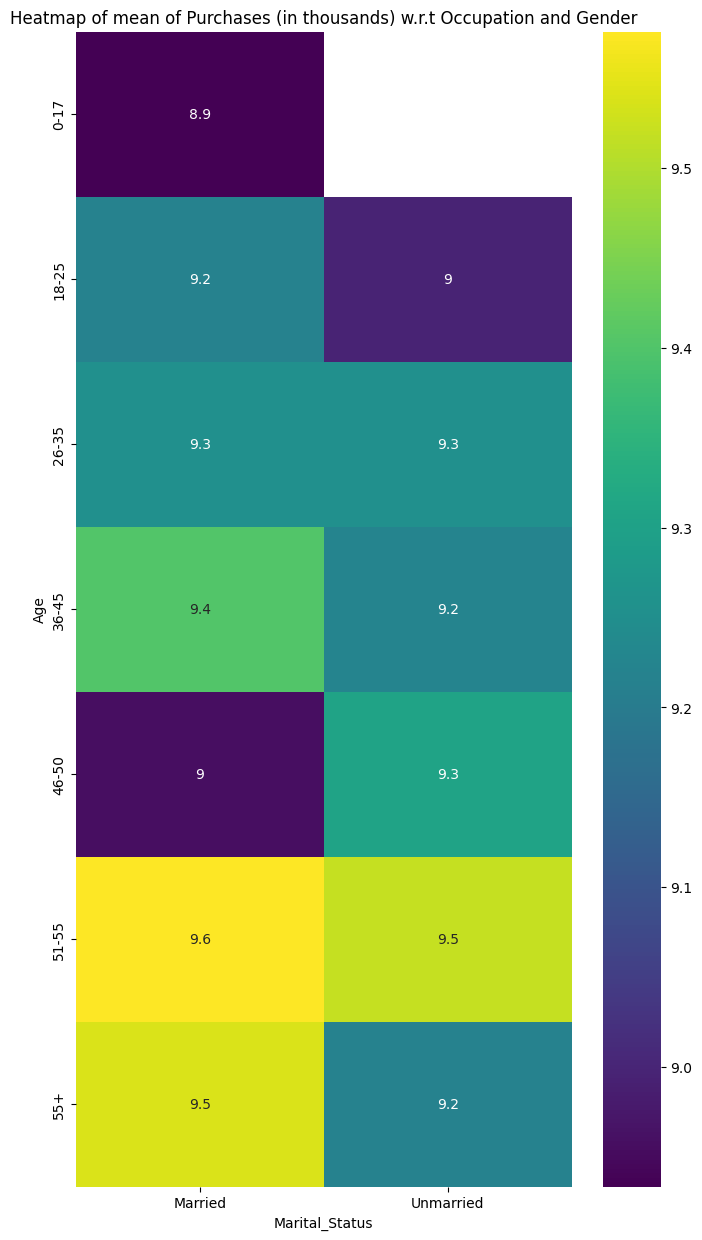

In [27]:
crosstab_result = pd.crosstab(df["Age"], df["Marital_Status"], values=df["Purchase"]/1000, aggfunc= "mean")
plt.figure(figsize = (8, 15))
sns.heatmap(crosstab_result, annot=True, cmap='viridis')
plt.title("Heatmap of mean of Purchases (in thousands) w.r.t Occupation and Gender")
plt.show()

Comments: There is no significant difference between Married and Unmarried people and their age group. almost all age group spent avg equal amount of money.

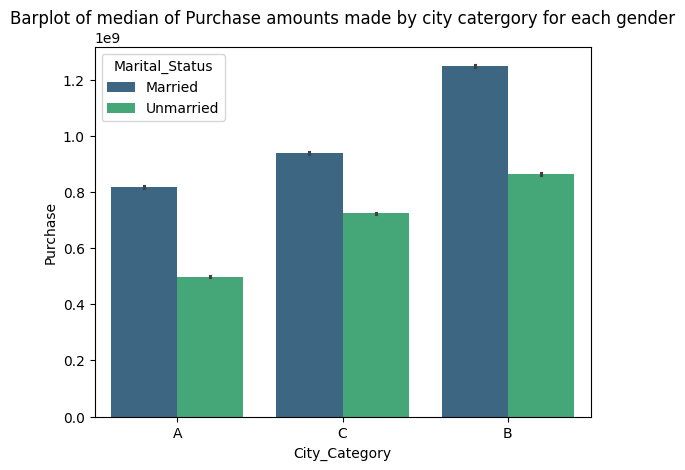

In [28]:
sns.barplot(data = df, y = "Purchase", x =  "City_Category", hue ="Marital_Status", palette = "viridis", estimator = "sum")
plt.title("Barplot of median of Purchase amounts made by city catergory for each gender")
plt.show()

Comments: The sum of amounts spent by Married people more than Unmarried people.

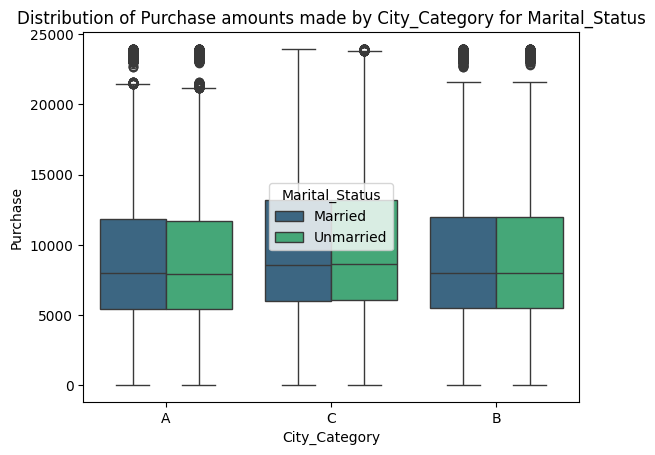

In [29]:
sns.boxplot(data = df, y = "Purchase", x =  "City_Category", hue ="Marital_Status", gap = 2, palette = "viridis")
plt.title("Distribution of Purchase amounts made by City_Category for Marital_Status")
plt.show()


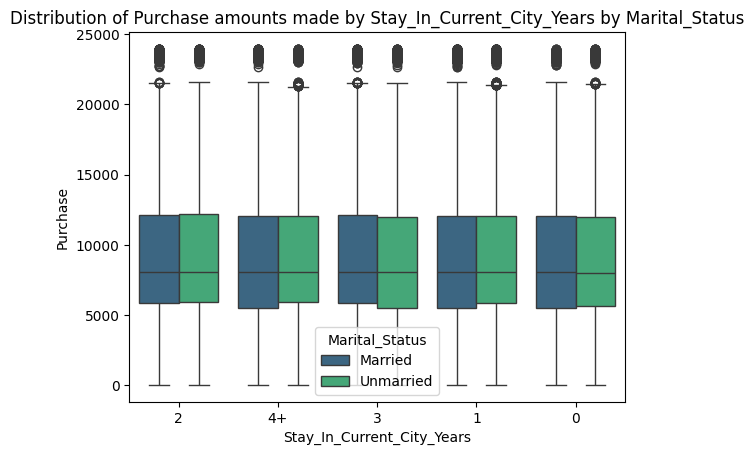

In [30]:
sns.boxplot(data = df, y = "Purchase", x =  "Stay_In_Current_City_Years", hue ="Marital_Status", gap = 2, palette = "viridis")
plt.title("Distribution of Purchase amounts made by Stay_In_Current_City_Years by Marital_Status")
plt.show()

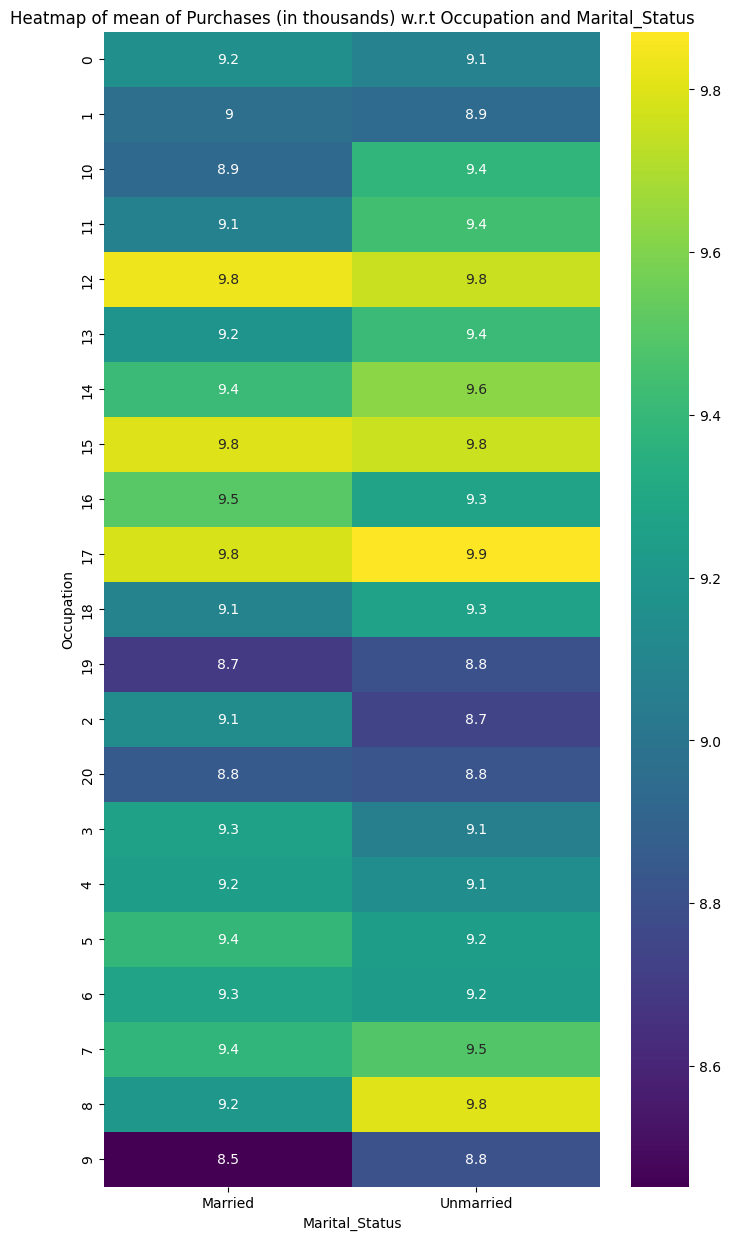

In [31]:
crosstab_result = pd.crosstab(df["Occupation"], df["Marital_Status"], values=df["Purchase"]/1000, aggfunc= "mean")
plt.figure(figsize = (8, 15))
sns.heatmap(crosstab_result, annot=True, cmap='viridis')
plt.title("Heatmap of mean of Purchases (in thousands) w.r.t Occupation and Marital_Status")
plt.show()

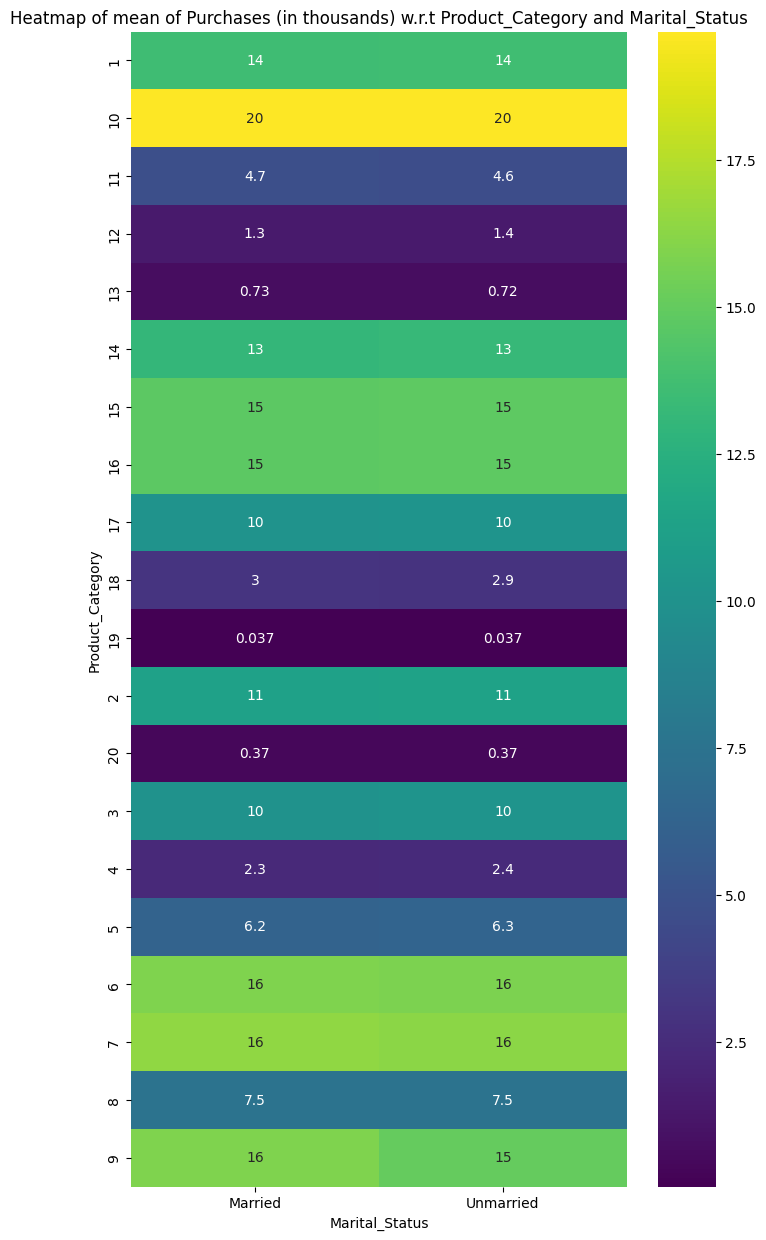

In [32]:
crosstab_result = pd.crosstab(df["Product_Category"], df["Marital_Status"], values=df["Purchase"]/1000, aggfunc= "mean")
plt.figure(figsize = (8, 15))
sns.heatmap(crosstab_result, annot=True, cmap='viridis')
plt.title("Heatmap of mean of Purchases (in thousands) w.r.t Product_Category and Marital_Status")
plt.show()

<Axes: >

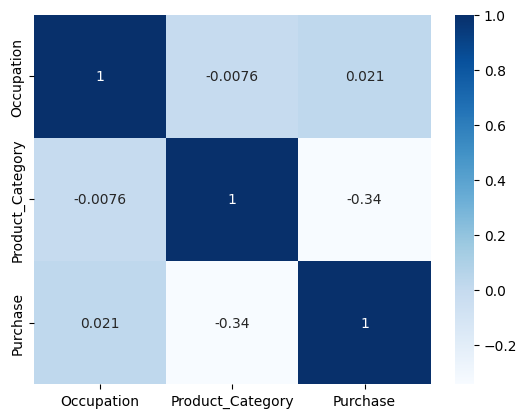

In [33]:
sns.heatmap(df[[ 'Occupation'
      , 'Product_Category',
       'Purchase']].corr(), cmap='Blues', annot =True)

Comments: There are no signficant correlation between Purchase, Product_Category and Occupation of customer

2. Missing Values detection

In [34]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Insights: There are no missing values in dataset

In [35]:
# outlier detection in Puchase column.
print(df["Purchase"].describe())
IQR = 12054 - 5823
Upper_bound = 12054 + 1.5 * IQR
print()
print("Number of Outliers in the Dataset: ", len(df.loc[df["Purchase"] > Upper_bound, "Purchase"]))
print()
print(round(df.loc[df["Purchase"] > Upper_bound, "Purchase"].sum()*100/df.loc[df["Purchase"] < Upper_bound, "Purchase"].sum(), 2), "% Purchase amount is outlier")

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

Number of Outliers in the Dataset:  2677

1.24 % Purchase amount is outlier


Insights: There are 2677 transations which are upper whisker outliers in Purchase column. Which translates to 1.2 % of total sum of Purchase amount.

4.1 Are women spending more money per transaction than men? Why or Why not?

In [78]:
df.groupby("Gender")["Purchase"].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

Insights: Mean of amount spent by Female is less than amount spent by Male.

4.2 Confidence intervals and distribution of the mean of the expenses by female and male customers

In [97]:
# Seperating female and male Purchase data
Female_data = df.loc[df["Gender"] == "F", "Purchase"]
Male_data = df.loc[df["Gender"] == "M", "Purchase"]

In [98]:
# Bootstrapping Famale data and performing CLT.
Bootstrapped_Female = []
for i in range(10000):
  BS = np.random.choice(Female_data, size = len(Female_data), replace = True)
  Bootstrapped_Female.append(BS.mean())

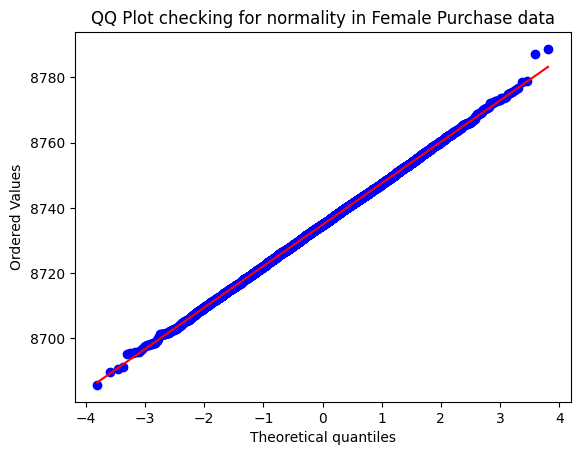

In [99]:
stats.probplot(Bootstrapped_Female, dist="norm", plot=plt)
plt.title('QQ Plot checking for normality in Female Purchase data')
plt.show()

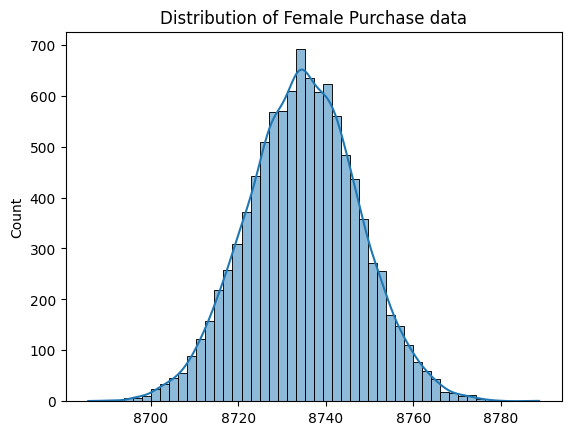

In [100]:
sns.histplot(Bootstrapped_Female, bins = 50, kde = True)
plt.title("Distribution of Female Purchase data")
plt.show()

**90% Confidence Interval of mean of Female purchase data**

In [178]:
mean = np.mean(Bootstrapped_Female)
std = np.std(Female_data)
n = len(Female_data)
se = std/np.sqrt(n)
CI = 90/100
CI_Female = norm.interval(CI, mean, se)
CI_Female

(8713.559303828155, 8756.115008167366)

Insights: 90% confidance interval of female purchase data is between (8713, 8756)

In [101]:
# Bootstrapping Male data and performing CLT.
Bootstrapped_Male = []
for i in range(10000):
  BS = np.random.choice(Male_data, size = len(Male_data), replace = True)
  Bootstrapped_Male.append(BS.mean())

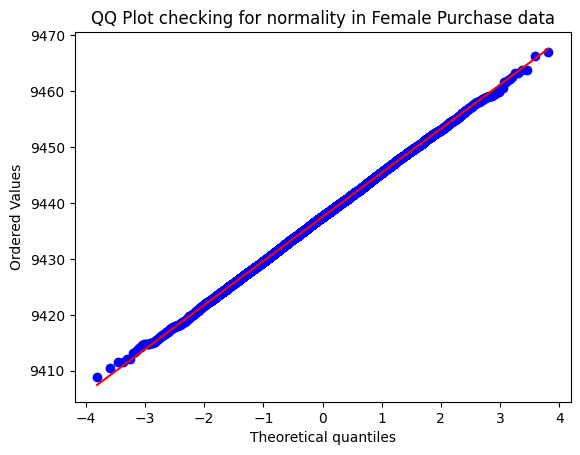

In [102]:
stats.probplot(Bootstrapped_Male, dist="norm", plot=plt)
plt.title('QQ Plot checking for normality in Male Purchase data')
plt.show()

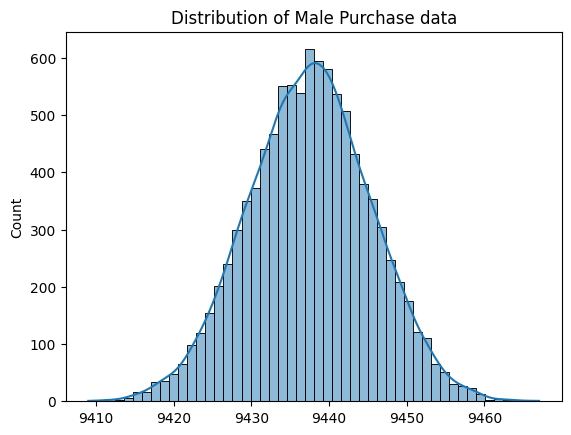

In [103]:
sns.histplot(Bootstrapped_Male, bins = 50, kde = True)
plt.title("Distribution of Male Purchase data")
plt.show()

**90% Confidence Interval of mean of Male purchase data**

In [177]:
mean = np.mean(Bootstrapped_Male)
std = np.std(Male_data)
n = len(Male_data)
se = std/np.sqrt(n)
CI = 90/100
CI_Male = norm.interval(CI, mean, se)
CI_Male

(9424.509768410464, 9450.536823329972)

Insights: 90% confidance interval of female purchase data is between (9424, 9450)

4.3 Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

In [199]:
if CI_Female[1] > CI_Male[0] and CI_Male[1] < CI_Female[0]:
  print("Confidence intervals of average male and female spending are OVERLAPPING")
else:
  print("Confidence intervals of average male and female spending are NOT OVERLAPPING")


Confidence intervals of average male and female spending are NOT OVERLAPPING


Insights: Confidence intervals of average male and female spending are NOT OVERLAPPING

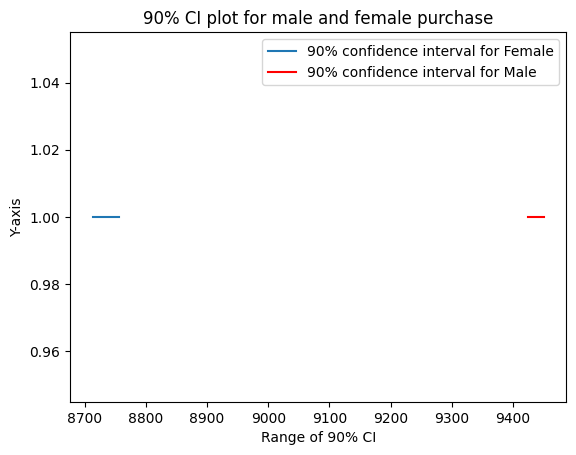

In [222]:
x1 = np.linspace(8713, 8756, 100)
y1 = [1] * len(x1)
x2 = np.linspace(9424, 9450, 100)
y2 = [1] * len(x2)
plt.plot(x1, y1, label='90% confidence interval for Female')
plt.plot(x2, y2, label='90% confidence interval for Male', color='red')
plt.xlabel('Range of 90% CI')
plt.ylabel('Y-axis')
plt.title('90% CI plot for male and female purchase')
plt.legend()
plt.show()


Insights: It is clearly visible that Confidence intervals are Non-overlapping.

Non-overlapping confidence intervals between female and male purchase amounts indicate a significant spending difference.

Walmart can Leverage this by customizing marketing campaigns, product offers, and store layouts to appeal to each gender.

Enhance customer experience with personalized services, adjust pricing strategies, and allocate resources based on spending patterns.



**Results when the same activity is performed for Married vs Unmarried**

In [224]:
df.groupby("Marital_Status")["Purchase"].mean()

Marital_Status
Married      9265.907619
Unmarried    9261.174574
Name: Purchase, dtype: float64

Mean of amount spent by Married is approximately equal to  Unmarried.

Confidence intervals and distribution of the mean of the expenses by Married and Unmarried customers

In [226]:
# Seperating Married and Unmarried Purchase data
Married_data = df.loc[df["Marital_Status"] == "Married", "Purchase"]
Unmarried_data = df.loc[df["Marital_Status"] == "Unmarried", "Purchase"]


In [227]:
# Bootstrapping Married data and performing CLT.
Bootstrapped_Married = []
for i in range(10000):
  BS = np.random.choice(Married_data, size = len(Married_data), replace = True)
  Bootstrapped_Married.append(BS.mean())

# Bootstrapping Unmarried data and performing CLT.
Bootstrapped_Unmarried = []
for i in range(10000):
  BS = np.random.choice(Unmarried_data, size = len(Unmarried_data), replace = True)
  Bootstrapped_Unmarried.append(BS.mean())

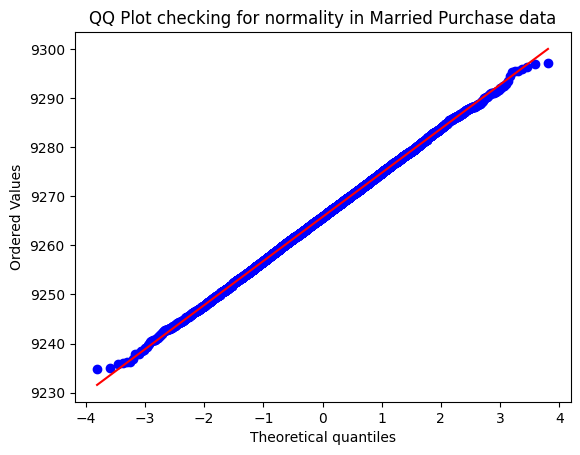

In [228]:
stats.probplot(Bootstrapped_Married, dist="norm", plot=plt)
plt.title('QQ Plot checking for normality in Married Purchase data')
plt.show()

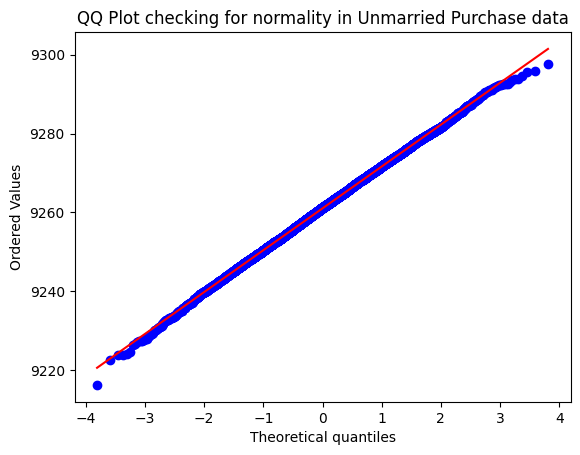

In [229]:
stats.probplot(Bootstrapped_Unmarried, dist="norm", plot=plt)
plt.title('QQ Plot checking for normality in Unmarried Purchase data')
plt.show()

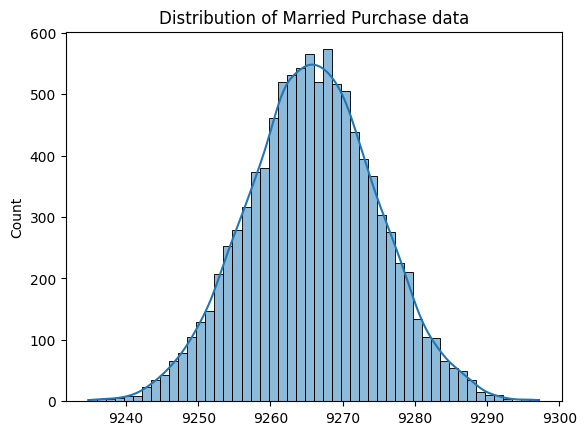

In [230]:
sns.histplot(Bootstrapped_Married, bins = 50, kde = True)
plt.title("Distribution of Married Purchase data")
plt.show()

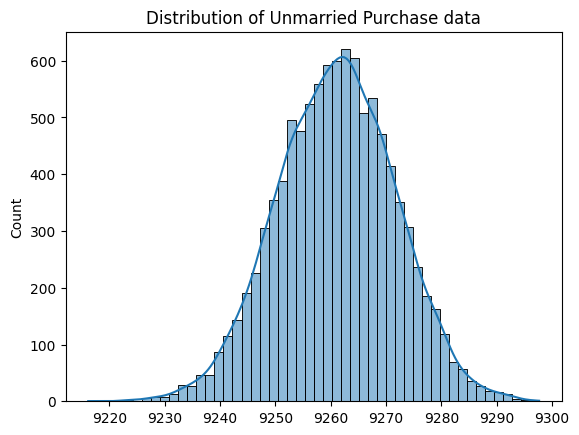

In [231]:
sns.histplot(Bootstrapped_Unmarried, bins = 50, kde = True)
plt.title("Distribution of Unmarried Purchase data")
plt.show()

Confidence interval of Married customer Purchase data

In [232]:
mean = np.mean(Bootstrapped_Married)
std = np.std(Married_data)
n = len(Married_data)
se = std/np.sqrt(n)
CI = 90/100
CI_Married = norm.interval(CI, mean, se)
CI_Married

(9251.295626121093, 9280.318047629797)

Insights: 90% confidece interval of married customer purchase data is (9251, 9280)

In [233]:
mean = np.mean(Bootstrapped_Unmarried)
std = np.std(Unmarried_data)
n = len(Unmarried_data)
se = std/np.sqrt(n)
CI = 90/100
CI_Unmarried = norm.interval(CI, mean, se)
CI_Unmarried

(9243.632989994145, 9278.40063320666)

Insights: 90% confidece interval of Unmarried customer purchase data is (9243, 9278)

Are confidence intervals of average Married and Unmarried spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

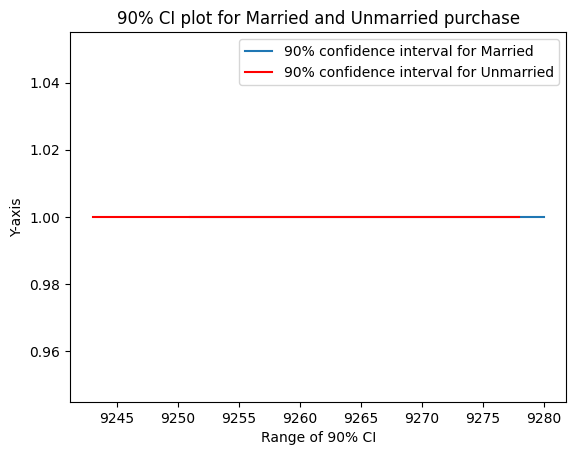

In [263]:
x1 = np.linspace(9251, 9280, 100)
y1 = [1] * len(x1)
x2 = np.linspace(9243, 9278, 100)
y2 = [1] * len(x2)
plt.plot(x1, y1, label='90% confidence interval for Married')
plt.plot(x2, y2, label='90% confidence interval for Unmarried', color='red')
plt.xlabel('Range of 90% CI')
plt.ylabel('Y-axis')
plt.title('90% CI plot for Married and Unmarried purchase')
plt.legend()
plt.show()


Insights: Confidence intervals of married and unmarried custmers are overlapping. This states that there is no significant difference between purchase of married and unmarried customer.
Walmart can perform unified marketing stretegy for married and unmarried customer.

**Results when the same activity is performed for Age**


In [240]:
df["Age"].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [241]:
# Seperating Married and Unmarried Purchase data
Age_26_35 = df.loc[df["Age"] == "26-35", "Purchase"]
Age_36_45 = df.loc[df["Age"] == "36-45", "Purchase"]

Age_18_25 = df.loc[df["Age"] == "18-25", "Purchase"]
Age_46_50 = df.loc[df["Age"] == "46-50", "Purchase"]

Age_51_55 = df.loc[df["Age"] == "51-55", "Purchase"]
Age_55_above = df.loc[df["Age"] == "55+", "Purchase"]

Age_0_17 = df.loc[df["Age"] == "0-17", "Purchase"]

# Bootstrapping 1
Bootstrapped_Age_26_35 = []
for i in range(1000):
  BS = np.random.choice(Age_26_35, size = len(Age_26_35), replace = True)
  Bootstrapped_Age_26_35.append(BS.mean())

# Bootstrapping 2
Bootstrapped_Age_36_45 = []
for i in range(1000):
  BS = np.random.choice(Age_36_45, size = len(Age_36_45), replace = True)
  Bootstrapped_Age_36_45.append(BS.mean())

# Bootstrapping 3
Bootstrapped_Age_18_25 = []
for i in range(1000):
  BS = np.random.choice(Age_18_25, size = len(Age_18_25), replace = True)
  Bootstrapped_Age_18_25.append(BS.mean())

# Bootstrapping 4
Bootstrapped_Age_46_50 = []
for i in range(1000):
  BS = np.random.choice(Age_46_50, size = len(Age_46_50), replace = True)
  Bootstrapped_Age_46_50.append(BS.mean())

# Bootstrapping 5
Bootstrapped_Age_51_55 = []
for i in range(1000):
  BS = np.random.choice(Age_51_55, size = len(Age_51_55), replace = True)
  Bootstrapped_Age_51_55.append(BS.mean())


# Bootstrapping 6
Bootstrapped_Age_55_above = []
for i in range(1000):
  BS = np.random.choice(Age_55_above, size = len(Age_55_above), replace = True)
  Bootstrapped_Age_55_above.append(BS.mean())

# Bootstrapping 7
Bootstrapped_Age_0_17 = []
for i in range(1000):
  BS = np.random.choice(Age_0_17, size = len(Age_0_17), replace = True)
  Bootstrapped_Age_0_17.append(BS.mean())


<Axes: ylabel='Count'>

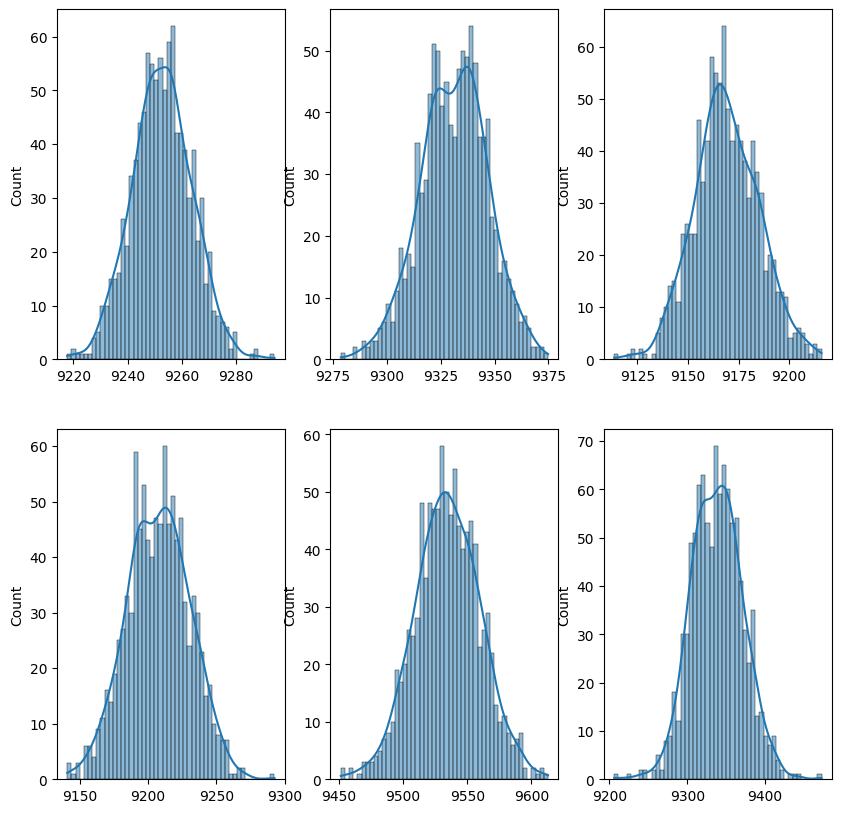

In [250]:
# Distruibution of mean of samples of Purchese for each age
fig, axs = plt.subplots(2, 3, figsize=(10, 10))
sns.histplot(Bootstrapped_Age_26_35, bins = 50, kde = True, ax=axs[0, 0])
sns.histplot(Bootstrapped_Age_36_45, bins = 50, kde = True, ax=axs[0, 1])
sns.histplot(Bootstrapped_Age_18_25, bins = 50, kde = True, ax=axs[0, 2])
sns.histplot(Bootstrapped_Age_46_50, bins = 50, kde = True, ax=axs[1, 0])
sns.histplot(Bootstrapped_Age_51_55, bins = 50, kde = True, ax=axs[1, 1])
sns.histplot(Bootstrapped_Age_55_above, bins = 50, kde = True, ax=axs[1, 2])

Calculating 90% confidance interval for each age group

In [260]:
BS = [Bootstrapped_Age_26_35, Bootstrapped_Age_36_45, Bootstrapped_Age_18_25, Bootstrapped_Age_46_50, Bootstrapped_Age_51_55, Bootstrapped_Age_55_above, Bootstrapped_Age_0_17]
data = [Age_26_35, Age_36_45, Age_18_25, Age_46_50, Age_51_55, Age_55_above, Age_0_17]

for i in range(len(BS)):
  mean = np.mean(BS[i])
  std = np.std(data[i])
  n = len(data[i])
  se = std/np.sqrt(n)
  CI = 90/100
  CI = norm.interval(CI, mean, se)
  print("90% Confidence Interval of Age group", i+1, "is", CI)

90% Confidence Interval of Age group 1 is (9235.164481738142, 9270.339666221436)
90% Confidence Interval of Age group 2 is (9306.42022135413, 9356.23863236316)
90% Confidence Interval of Age group 3 is (9142.917342437871, 9195.378228543468)
90% Confidence Interval of Age group 4 is (9169.368683254754, 9245.805523742907)
90% Confidence Interval of Age group 5 is (9492.060130265174, 9577.35222255683)
90% Confidence Interval of Age group 6 is (9282.101871251565, 9394.52476063088)
90% Confidence Interval of Age group 7 is (8865.609797563207, 9002.427159396138)


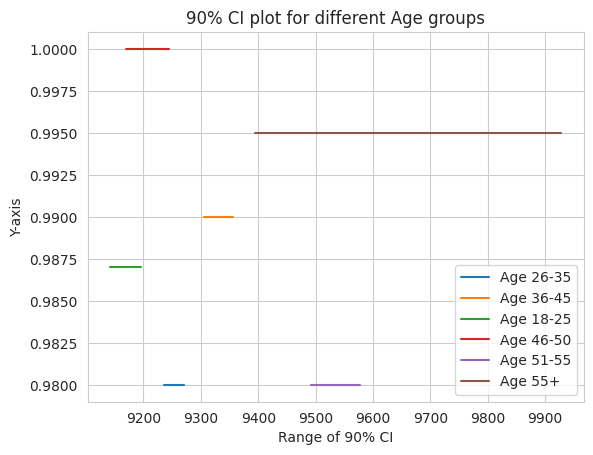

In [290]:
x1 = np.linspace(9235, 9270, 100)
y1 = [.98] * len(x1)

x2 = np.linspace(9306, 9356, 100)
y2 = [.99] * len(x2)

x3 = np.linspace(9142, 9195, 100)
y3 = [.987] * len(x1)

x4 = np.linspace(9169, 9245, 100)
y4 = [1] * len(x2)

x5 = np.linspace(9492, 9577, 100)
y5 = [.98] * len(x1)

x6 = np.linspace(9928, 9394, 100)
y6 = [.995] * len(x2)


plt.plot(x1, y1, label='Age 26-35')
plt.plot(x2, y2, label='Age 36-45')
plt.plot(x3, y3, label='Age 18-25')
plt.plot(x4, y4, label='Age 46-50')

plt.plot(x5, y5, label='Age 51-55')
plt.plot(x6, y6, label='Age 55+')

sns.set_style('whitegrid')

plt.xlabel('Range of 90% CI')
plt.ylabel('Y-axis')
plt.title('90% CI plot for different Age groups')
plt.legend()
plt.show()


Insights: Confidence intervel of Some Age group overlaps like Age group 55+ and 51 to 55 and Age 18 to 25, 46 - 50 and 26-35 overlaps.

Other Groups does not overlaps this suggest that walmart should to target advertising based on Age group of customers.

**5 & 6 Final Insights and Recommendations**

**Insights**

1. Who Buys More?:

Men make about three times more purchases than women.

The ratio of purchases in different city categories is 27:31:42 (A:B:C).

2. Married vs. Unmarried:

Almost 60% of customers are married.

There's no big difference in spending between married and unmarried customers.

3. Where People Spend More?:
Men spend more money across all city categories, with city B leading.

How long someone has lived in a city doesn't affect spending much.

4. Job and Buying Stuff:

Different jobs don't lead to big differences in spending.

Both men and women buy almost the same amount of different products.

5. Outliers and Missing Data:

No data is missing, but there are some unusual high spending values.

These high spenders make up about 1.24% of total spending.

6. Spending by Gender:

On average, men spend more than women.

Men's average spending is around $9437, while women's is around $8735.

7. Confidence and Differences:

There's a significant difference in spending between men and women.

Married and unmarried people spend about the same.

8. Unified Approach:

Since married and unmarried people spend similarly, Walmart can use one
marketing strategy for both groups.

Walmart can also target different age groups with specific ads to boost sales.

**Recommendations**

**Target Men in Ads:** Since men spend more, focus advertising campaigns to attract more male shoppers, especially in city categories B and C where spending is highest.

**Unified Marketing Strategy:** Don't separate marketing campaigns by marital status since there's no significant spending difference between married and unmarried customers. Use the same marketing approaches for both groups.
Special Promotions for Big Spenders: Identify and target customers who are spending a lot (the outliers). Offer them loyalty programs or special deals to keep them coming back.

**Adjust Product Offers by Gender:** Tailor product offers based on gender preferences since men and women spend differently. Ensure that products appealing more to men are prominently displayed and advertised.

Age-specific Marketing: Design marketing campaigns that appeal to different age groups based on their specific spending habits and preferences.

**Enhance Online and In-store Experience:** Since spending doesn’t vary much with the length of stay in a city, focus on enhancing both online and in-store shopping experiences to cater to both new and long-term residents equally.



In [ ]:
!jupyter nbconvert --to pdf /content/Walmart_Case_Study.ipynb